# Join the two datasets

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
df_hourly_weather = pd.read_pickle("datasets\hourly_weather.pkl")
df_accidents = pd.read_pickle("datasets\\accidents.pkl")

In [3]:
df_hourly_weather.columns

Index(['date', 'air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation', 'dew_point',
       'global_radiation', 'humidity', 'water_level'],
      dtype='object')

In [4]:
df_accidents.columns

Index(['AccidentUID', 'AccidentType', 'AccidentType_de', 'AccidentType_fr',
       'AccidentType_it', 'AccidentType_en', 'AccidentSeverityCategory',
       'AccidentSeverityCategory_de', 'AccidentSeverityCategory_fr',
       'AccidentSeverityCategory_it', 'AccidentSeverityCategory_en',
       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType', 'RoadType_de', 'RoadType_fr',
       'RoadType_it', 'RoadType_en', 'AccidentLocation_CHLV95_E',
       'AccidentLocation_CHLV95_N', 'CantonCode', 'MunicipalityCode',
       'AccidentYear', 'AccidentMonth', 'AccidentMonth_de', 'AccidentMonth_fr',
       'AccidentMonth_it', 'AccidentMonth_en', 'AccidentWeekDay',
       'AccidentWeekDay_de', 'AccidentWeekDay_fr', 'AccidentWeekDay_it',
       'AccidentWeekDay_en', 'AccidentHour', 'AccidentHour_text', 'day',
       'date'],
      dtype='object')

### I) Preprocessing for joining the dataframes

In [5]:
#drop columns in accidents dataframe that are not necessary
df_accidents = df_accidents.drop(['AccidentUID', 'day', 'AccidentHour_text', 'AccidentWeekDay_en', 'AccidentYear'], axis = 1)
df_accidents = df_accidents.drop(['AccidentType_en', 'AccidentSeverityCategory_en', 'RoadType_en', 'AccidentSeverityCategory_en',
                                 'CantonCode', 'MunicipalityCode', 'AccidentMonth_en'], axis = 1)

#### One Hot Encoding of categorical cols and normalization:

Notes: 
<br>
$a)$ One Hot Encoding for vars of type object
<br>
$b)$ AccidentLocation should be normalized because too many different categories

In [6]:
df_accidents.head(5)

,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,...,AccidentMonth,AccidentMonth_de,AccidentMonth_fr,AccidentMonth_it,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentHour,date
0,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,False,False,...,1,Januar,janvier,Gennaio,aw406,Samstag,samedi,Sabato,0.0,2011-01-01 00:30:00
1,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,False,True,...,1,Januar,janvier,Gennaio,aw406,Samstag,samedi,Sabato,1.0,2011-01-01 01:30:00
2,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,False,False,...,1,Januar,janvier,Gennaio,aw406,Samstag,samedi,Sabato,2.0,2011-01-01 02:30:00
3,at5,Überqueren der Fahrbahn,accident en traversant une route,Incidente nell'attraversare la carreggiata,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,False,False,...,1,Januar,janvier,Gennaio,aw406,Samstag,samedi,Sabato,2.0,2011-01-01 02:30:00
4,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,False,False,...,1,Januar,janvier,Gennaio,aw406,Samstag,samedi,Sabato,3.0,2011-01-01 03:30:00


In [7]:
#Convert boolean cols to boolean values:
df_accidents['AccidentInvolvingPedestrian'] = 1*df_accidents['AccidentInvolvingPedestrian'].values
df_accidents['AccidentInvolvingBicycle'] = 1*df_accidents['AccidentInvolvingBicycle'].values
df_accidents['AccidentInvolvingMotorcycle'] = 1*df_accidents['AccidentInvolvingMotorcycle'].values

In [8]:
#one hot encoding for cols that need to be transformed
categorical_cols = list(df_accidents.select_dtypes(include=['object']).columns)
categorical_cols.extend(['AccidentMonth', 'AccidentHour'])
df_accidents = pd.get_dummies(df_accidents, columns = categorical_cols, drop_first= True, dtype= bool)
df_accidents.columns

Index(['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'AccidentLocation_CHLV95_E',
       'AccidentLocation_CHLV95_N', 'date', 'AccidentType_at00',
       'AccidentType_at1', 'AccidentType_at2', 'AccidentType_at3',
       ...
       'AccidentHour_14.0', 'AccidentHour_15.0', 'AccidentHour_16.0',
       'AccidentHour_17.0', 'AccidentHour_18.0', 'AccidentHour_19.0',
       'AccidentHour_20.0', 'AccidentHour_21.0', 'AccidentHour_22.0',
       'AccidentHour_23.0'],
      dtype='object', length=169)

In [9]:
df_accidents.head()

,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,date,AccidentType_at00,AccidentType_at1,AccidentType_at2,AccidentType_at3,...,AccidentHour_14.0,AccidentHour_15.0,AccidentHour_16.0,AccidentHour_17.0,AccidentHour_18.0,AccidentHour_19.0,AccidentHour_20.0,AccidentHour_21.0,AccidentHour_22.0,AccidentHour_23.0
0,0,0,0,2684605,1245194,2011-01-01 00:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,2682382,1246980,2011-01-01 01:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,2682791,1247749,2011-01-01 02:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,2681199,1247102,2011-01-01 02:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,2682479,1250690,2011-01-01 03:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Convert boolean cols to boolean integers:

In [10]:
bool_cols = list(df_accidents.select_dtypes(include=['bool']).columns)
for i in bool_cols:
    df_accidents[i] = 1*df_accidents[i]

Note: 
<br>
Since there are too many different locations in 'AccidentLocation_CHLV95_E' and 'AccidentLocation_CHLV95_N', it would be inappropriate to one hot encode these... So instead we will normalize them.
<br>
We will nevertheless check the distribution of accidents across locations because it might offer some insight regarding locations that are more dangerous...

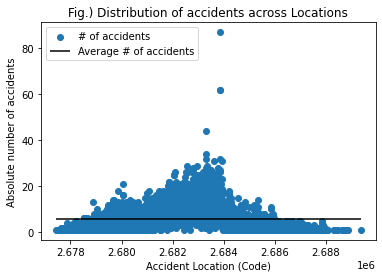

In [11]:
import matplotlib.pyplot as plt
location_dict = df_accidents['AccidentLocation_CHLV95_E'].value_counts().to_dict()
plt.title('Fig.) Distribution of accidents across Locations')
plt.scatter(location_dict.keys(), location_dict.values(), label = '# of accidents')
plt.ylabel('Absolute number of accidents')
plt.xlabel('Accident Location (Code)')
plt.hlines(np.mean(list(location_dict.values())), min(list(location_dict.keys())), 
           max(list(location_dict.keys())), color = 'black', label = 'Average # of accidents')
plt.legend(loc = 'best')

In [12]:
#normalize values of accident locations
from sklearn import preprocessing
column_E, column_N = np.array(df_accidents.pop('AccidentLocation_CHLV95_E')), np.array(df_accidents.pop('AccidentLocation_CHLV95_N'))
normalized_E, normalized_N = preprocessing.normalize([column_E]), preprocessing.normalize([column_N])
df_accidents.insert(6, 'AccidentLocation_CHLV95_E', normalized_E.reshape(-1,1))
df_accidents.insert(7, 'AccidentLocation_CHLV95_N', normalized_N.reshape(-1,1))

In [13]:
#move date column in accidents df to first position
first_column = df_accidents.pop('date')
df_accidents.insert(0, 'date', first_column)

### II) Preprocessing of columns in weather dataframe

In [14]:
df_hourly_weather.head()

,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,2011-01-01 00:30:00,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,0.0,1.616667,0.5,95.833333,67.635
1,2011-01-01 01:30:00,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,0.0,1.520000,0.6,93.600000,81.162
2,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,0.0,1.380000,0.0,92.000000,81.162
3,2011-01-01 03:30:00,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,0.0,1.500000,0.0,92.800000,81.162
4,2011-01-01 04:30:00,2.500000,5.10,4.0,1.580000,1.580000,1108,1.62,973.16,0.0,0.720000,0.2,88.200000,81.162


In [15]:
#normalize columns that have too large values
cols_to_normalize = df_hourly_weather.loc[:, df_hourly_weather.columns != 'date']
index_of_cols = [df_hourly_weather.columns.get_loc(i) for i in cols_to_normalize]

for i in cols_to_normalize:
    index = df_hourly_weather.columns.get_loc(i)
    col = np.array(df_hourly_weather.pop(i))
    norm_col = preprocessing.normalize([col])
    df_hourly_weather.insert(index, i, norm_col.reshape(-1,1))
df_hourly_weather.head()

,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,2011-01-01 00:30:00,0.000566,0.001231,0.001618,0.001908,0.001960,0.006262,0.000581,0.003582,0.0,0.000604,0.000007,0.004366,0.002961
1,2011-01-01 01:30:00,0.000603,0.001231,0.001887,0.001348,0.001385,0.003775,0.000570,0.003580,0.0,0.000568,0.000008,0.004264,0.003553
2,2011-01-01 02:30:00,0.000654,0.001217,0.000809,0.000533,0.000548,0.004066,0.000681,0.003579,0.0,0.000515,0.000000,0.004191,0.003553
3,2011-01-01 03:30:00,0.000634,0.001221,0.001281,0.000815,0.000838,0.003936,0.000670,0.003578,0.0,0.000560,0.000000,0.004227,0.003553
4,2011-01-01 04:30:00,0.000634,0.001207,0.002696,0.002477,0.002545,0.003887,0.000428,0.003577,0.0,0.000269,0.000003,0.004018,0.003553


In [16]:
print(df_accidents.shape, df_hourly_weather.shape)

(48017, 169) (78707, 14)


### II) Merge the two datasets

In [17]:
df_join = pd.merge(df_hourly_weather, df_accidents, on='date', how='left')
df_join.shape

(92081, 182)

In [18]:
df_join.columns

Index(['date', 'air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation',
       ...
       'AccidentHour_14.0', 'AccidentHour_15.0', 'AccidentHour_16.0',
       'AccidentHour_17.0', 'AccidentHour_18.0', 'AccidentHour_19.0',
       'AccidentHour_20.0', 'AccidentHour_21.0', 'AccidentHour_22.0',
       'AccidentHour_23.0'],
      dtype='object', length=182)

### Notes: 

Main question:
<br>
$a)$ Will there be an accident for given weather data?
<br>
$\rightarrow$ add dummy for whether an accident happened or not:

In [19]:
df_join['Accident'] = np.where(df_join.isnull().any(axis = 1), 0, 1)
df_join.head()

,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,...,AccidentHour_15.0,AccidentHour_16.0,AccidentHour_17.0,AccidentHour_18.0,AccidentHour_19.0,AccidentHour_20.0,AccidentHour_21.0,AccidentHour_22.0,AccidentHour_23.0,Accident
0,2011-01-01 00:30:00,0.000566,0.001231,0.001618,0.001908,0.001960,0.006262,0.000581,0.003582,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2011-01-01 01:30:00,0.000603,0.001231,0.001887,0.001348,0.001385,0.003775,0.000570,0.003580,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2011-01-01 02:30:00,0.000654,0.001217,0.000809,0.000533,0.000548,0.004066,0.000681,0.003579,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2011-01-01 02:30:00,0.000654,0.001217,0.000809,0.000533,0.000548,0.004066,0.000681,0.003579,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2011-01-01 03:30:00,0.000634,0.001221,0.001281,0.000815,0.000838,0.003936,0.000670,0.003578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [20]:
df_join.to_csv('datasets\\dataset.csv')

### Thoughts on proceeding:

- Since we don't have data for accident location when there is no accident(hahaha) and also this predictor is highly correlated with the outcome..., we might wanna drop this one... The same is true for road type.
<br>
- We should add dummies for the hours of the weather data as well as the day and so on variables because the date variable shouldn't be included in as a feature in the training process. 